In [1]:
#for scraping
import requests
from bs4 import BeautifulSoup
#pandas
import pandas as pd
#vis
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from time import sleep
from tqdm import tqdm
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
!pip install lxml

# Scraping


### Primero vamos a testear con una competición y para luego hacer el scraping de todo

In [121]:
url = 'https://www.vlr.gg/event/stats/1130/champions-tour-north-america-last-chance-qualifier'

In [122]:
data = requests.get(url)

In [123]:
soup = BeautifulSoup(data.content, 'lxml')

In [5]:
body = soup.find_all('td', attrs= {'class' : 'mod-player mod-a'})

In [14]:
body[0].contents[1].contents[3].contents[1].contents

['BABYBAY']

In [62]:
table = soup.find_all('table', class_= 'wf-table mod-stats mod-scroll')

In [115]:
soup.tr.th

<th class="mod-player" style="width: 120px; min-width: 120px;">Player<i></i></th>

In [16]:
headers = soup.find_all('tr')
headers[0].contents[1].contents[0]

'Player'

In [133]:
## find agents for players
lst = str(soup.find_all('td', class_='mod-agents')).split(sep='/')
lst[0:30]

['[<td class="mod-agents">\n<div>\n<img class="mod-small" src="',
 'img',
 'vlr',
 'game',
 'agents',
 'kayo.png"',
 '>\n<img class="mod-small" src="',
 'img',
 'vlr',
 'game',
 'agents',
 'skye.png"',
 '>\n<img class="mod-small" src="',
 'img',
 'vlr',
 'game',
 'agents',
 'raze.png"',
 '>\n<div>(+1)<',
 'div> <',
 'div>\n<',
 'td>, <td class="mod-agents">\n<div>\n<img class="" src="',
 'img',
 'vlr',
 'game',
 'agents',
 'chamber.png"',
 '>\n<',
 'div>\n<',
 'td>, <td class="mod-agents">\n<div>\n<img class="mod-small" src="']

In [129]:
## Una forma poco elegante de quedarnos con una lista de listas de agentes para poder matchear para cada jugador
agents_lst = []       
lstx = []

for i in lst:
    if '.png' in i:
        lstx.append(i.split(sep='.')[0])
    elif 'mod-agents' in i:
        agents_lst.append(lstx)
        lstx = []
    elif 'td>]' in i:
        agents_lst.append(lstx)

In [131]:
agents_lst

[[],
 ['kayo', 'skye', 'raze'],
 ['chamber'],
 ['raze', 'jett', 'phoenix'],
 ['sova', 'fade'],
 ['kayo', 'neon', 'fade'],
 ['chamber'],
 ['omen', 'viper'],
 ['kayo', 'fade'],
 ['chamber', 'phoenix'],
 ['kayo', 'raze'],
 ['viper', 'brimstone', 'omen'],
 ['neon', 'raze', 'chamber'],
 ['jett', 'chamber', 'raze'],
 ['kayo', 'neon'],
 ['omen', 'brimstone', 'viper'],
 ['sova', 'fade', 'breach'],
 ['chamber'],
 ['chamber', 'sage'],
 ['viper', 'omen'],
 ['kayo', 'brimstone', 'chamber'],
 ['sova', 'fade'],
 ['chamber', 'raze', 'jett'],
 ['sage', 'skye', 'sova'],
 ['viper', 'brimstone', 'astra'],
 ['fade', 'sage', 'kayo'],
 ['chamber', 'killjoy', 'viper'],
 ['sova', 'breach'],
 ['viper', 'astra', 'brimstone'],
 ['viper', 'omen', 'kayo'],
 ['chamber', 'cypher', 'sage'],
 ['sova', 'killjoy', 'breach'],
 ['sage', 'viper', 'cypher'],
 ['fade', 'breach', 'sova'],
 ['kayo', 'neon', 'yoru'],
 ['sova', 'sage'],
 ['sage', 'kayo'],
 ['viper', 'astra', 'brimstone'],
 ['fade', 'viper', 'sova'],
 ['sage', 'k

In [129]:
# Get columns
cols = []
for i in range(2, 41):
    if i % 2 == 1:
        cols.append(str(list(headers[0])[i]).split(sep='"')[5])
        

In [131]:
cols.insert(0, 'Player')

In [7]:
df = pd.read_html(data.text)

In [8]:
df = df[0]

## Scrapeamos todos los torneos

In [2]:
url = "https://www.vlr.gg/vct/?region=52"

data = requests.get(url)
soup = BeautifulSoup(data.text)

In [3]:
body = soup.find_all('a')
links = [l.get('href') for l in body]

In [4]:
## GET LINKS FOR TOURNAMENTS. THE [0:-1] IS TO LEAVE A NONETYPE OUT OF THE LIST C

links = [l for l in links[0:-1] if 'north-america' in l]

In [5]:
# STORE LINKS IN LIST
t_links = [f'https://www.vlr.gg{l}' for l in links]

In [6]:
t_links

['https://www.vlr.gg/event/1130/champions-tour-north-america-last-chance-qualifier',
 'https://www.vlr.gg/event/800/champions-tour-north-america-stage-2-challengers',
 'https://www.vlr.gg/event/799/champions-tour-north-america-stage-1-challengers']

In [7]:
url1 = t_links[1]
data = requests.get(url1)
soup = BeautifulSoup(data.content)
    
    

In [31]:
a = soup.find_all('a')
stats = [a.get('href') for a in a]

In [32]:
stats = [l for l in stats[:-1] if '/event/stats' in l]
stats

['/event/stats/800/champions-tour-north-america-stage-2-challengers']

In [136]:
#### Función
url = 'https://www.vlr.gg/vct'
placements = []
p_stats = []
def scrape(url):
    ## request url, create BS4
    data = requests.get(url)
    soup = BeautifulSoup(data.content)
    
    # Get links for toruneys
    # First find all 'a' classes
    links = soup.find_all('a')
    # Get href links
    links = [links.get('href') for links in links]
    # Filter
    links = [l for l in links[:-1] if 'event/' in l]
    links = [f"https://www.vlr.gg{l}" for l in links]         ## Leave ongoing tournament outside
    #return links
    # loop through tournament links
    for link in tqdm(links):
        data = requests.get(link)
        # first get placements table
        tourney = pd.read_html(data.text)
        tourney = tourney[0]
        # Add 'Competition' column as identifier
        tourney['Competition'] = link.split('/')[-1].replace('-', ' ')
        # append to 'Placements' dataframe
        placements.append(tourney)
        
        # Now get stats for players
        soup = BeautifulSoup(data.content)
        # Find 'a' tags where 'href's are
        a = soup.find_all('a')
        stats = [a.get('href') for a in a]
        # Get link for stats page
        stats_l = [l for l in stats[:-1] if '/event/stats' in l]
        stats_l = [f'https://www.vlr.gg{l}' for l in stats_l]
        data = requests.get(stats_l[0])
        # read_html for table
        player_stats = pd.read_html(data.text)
        # Get actual table
        player_stats = player_stats[0]
        # Competition name for new column
        player_stats['Competition'] = link.split('/')[-1].replace('-', ' ')
        
        # Get agents
        soup = BeautifulSoup(data.content)
        lst = str(soup.find_all('td', class_='mod-agents')).split(sep='/')
        agents_lst = []       
        lstx = []

        for i in lst:
            if '.png' in i:
                lstx.append(i.split(sep='.')[0])
            elif 'mod-agents' in i:
                agents_lst.append(lstx)
                lstx = []
            elif 'td>]' in i:
                agents_lst.append(lstx)
        player_stats['Agents'] = agents_lst[1:]
        # Append to main dataframe
        p_stats.append(player_stats)
        # sleep to avoid too many requests
        time.sleep(0.5)
        
        


scrape(url)

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [03:09<00:00,  3.26s/it]


In [137]:
pstats_df = pd.concat(p_stats)
placements_df = pd.concat(placements)

In [138]:
pstats_df.head()

,Player,Agents,Rnd,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMax,K,D,A,FK,FD,Competition
0,kiNgg LEV,"[raze, kayo, viper]",179,260.0,1.36,77%,160.9,0.89,0.30,0.23,0.12,23%,11%,2/18,26,159,117,53,42,21,valorant champions 2022
1,yay OPTC,"[chamber, jett]",492,254.6,1.50,73%,159.8,0.93,0.09,0.20,0.08,26%,15%,9/59,30,460,306,42,96,40,valorant champions 2022
2,Derke FNC,"[chamber, jett]",319,247.9,1.39,70%,166.2,0.92,0.13,0.17,0.15,34%,21%,5/24,31,292,210,42,53,47,valorant champions 2022
3,ZmjjKK EDG,"[chamber, raze]",107,247.8,1.07,74%,150.5,0.82,0.15,0.23,0.09,25%,13%,2/15,19,88,82,16,25,10,valorant champions 2022
4,Will 100T,"[raze, chamber, jett]",157,245.3,1.16,72%,155.0,0.86,0.19,0.20,0.13,18%,13%,2/16,28,135,116,30,31,21,valorant champions 2022


In [9]:
placements_df.head()

,Place,Prize,Team,Unnamed: 3,Unnamed: 4,Competition,Note,Circuit Points
0,1st,"$300,000 USD",LOUD Brazil,NaN,NaN,valorant champions 2022,NaN,NaN
1,2nd,"$150,000 USD",OpTic Gaming United States,NaN,NaN,valorant champions 2022,NaN,NaN
2,3rd,"$110,000 USD",DRX South Korea,NaN,NaN,valorant champions 2022,NaN,NaN
3,4th,"$80,000 USD",FunPlus Phoenix Europe,NaN,NaN,valorant champions 2022,NaN,NaN
4,5th–6th,"$60,000 USD",XSET United States,NaN,NaN,valorant champions 2022,NaN,NaN


In [12]:
placements_df.Note.isnull().value_counts()

True     282
False    152
Name: Note, dtype: int64

In [13]:
placements_df['Circuit Points'].isnull().value_counts()

True     328
False    106
Name: Circuit Points, dtype: int64

In [16]:
placements_df[['Unnamed: 4', 'Unnamed: 3']].isnull().value_counts()

Unnamed: 4  Unnamed: 3
True        True          434
dtype: int64

In [139]:
placements_df.drop(['Unnamed: 4', 'Unnamed: 3'], axis=1, inplace=True)

In [18]:
pstats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11653 entries, 0 to 340
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       11653 non-null  object 
 1   Agents       1981 non-null   object 
 2   Rnd          11653 non-null  int64  
 3   ACS          11653 non-null  float64
 4   K:D          11653 non-null  float64
 5   KAST         11649 non-null  object 
 6   ADR          11649 non-null  float64
 7   KPR          11653 non-null  float64
 8   APR          11653 non-null  float64
 9   FKPR         11653 non-null  float64
 10  FDPR         11649 non-null  float64
 11  HS%          11647 non-null  object 
 12  CL%          8168 non-null   object 
 13  CL           11599 non-null  object 
 14  KMax         11653 non-null  int64  
 15  K            11653 non-null  int64  
 16  D            11653 non-null  int64  
 17  A            11653 non-null  int64  
 18  FK           11653 non-null  int64  
 19  FD    

In [210]:
pstats_df['CL%'] = pstats_df['CL%'].fillna('0%')
pstats_df['KAST%'] = pstats_df['KAST%'].fillna('0%')
pstats_df['HS%'] = pstats_df['HS%'].fillna('0%')

In [141]:
## Cambiar el tipo de dato a entero en las columnas de %
pstats_df['CL%'] = pstats_df['CL%'].apply(lambda x: int(x.split('%')[0]))

In [211]:
pstats_df.rename({'KAST': 'KAST%'}, axis=1, inplace=True)

pstats_df['KAST%'] = pstats_df['KAST%'].apply(lambda x: int(x.split('%')[0]))
pstats_df['HS%'] = pstats_df['HS%'].apply(lambda x: int(x.split('%')[0]))

In [ ]:
pstats_df

In [145]:
## Los nombres de los equipos están separados por doble espacio
pstats_df['Team'] = pstats_df.Player.apply(lambda x: ''.join(x.split('  ')[-1]))
pstats_df['Team'].unique()

pstats_df['Player'] = pstats_df.Player.apply(lambda x: x.split('  ')[0])

In [146]:
## No se explica el tag "Team". Puede que sean equipos independientes 
## a los que se les defaultea el tag genérico. 
pstats_df[pstats_df['Team'] == 'Team']['Player'].value_counts()

chris           2
Taiga           2
Rya             2
alain           2
kataomi         2
               ..
Nara            1
druid           1
FlyingCoffee    1
Swipe           1
Spyabo          1
Name: Player, Length: 178, dtype: int64

In [147]:
pstats_df.Team.value_counts()

Team         194
The           58
FS            48
KRÜ           46
TL            41
            ... 
BCG            1
Titx           1
Clev           1
Shinryaku      1
Gods           1
Name: Team, Length: 1396, dtype: int64

In [153]:
## Esto puede ser un problema de formateo o un caso similar al de "Team"
pstats_df[pstats_df['Team'] == 'The']['Player']

1189                Royal
1230                 tyzh
1377          BALEROSTYLE
1425            Pedracula
1427                wartz
1468                  brN
1529                sonho
1535            SPLINTEYY
1570            Fedrigues
1596                 SHEN
2790                pedio
2877             Squenzer
2911            Descendit
2924                Jrcyy
2928              BLAZTxD
3029                 M1KE
3048              Freckie
3069                 WeKa
3089               Vigixz
3109                 Bill
3128                  SiN
3157        I Love Esther
3173               Mizern
3223     thatswhatshesaid
3321                 gabu
3391              FakeIGN
4042                litzZ
4253            Pedracula
4264                bl0od
4297               Xamber
4340                   lt
4373            Fedrigues
4466            SPLINTEYY
4889                Muawi
5213                Flame
5266             BIG CHAD
5271        Chad The Frog
5377                 a1dz
7650        

In [154]:
pstats_df[pstats_df['Team'] == 'NRG']['Player']

131         s0m
139         tex
142        eeiu
144       Ethan
145       hazed
550         s0m
575         tex
600        eeiu
645       Ethan
837       hazed
4618        s0m
4696       eeiu
4751    ANDROID
4831        tex
5134      hazed
Name: Player, dtype: object

In [149]:
pstats_df.reset_index(inplace=True)

In [150]:
pstats_df.drop('index', axis=1, inplace=True)

In [151]:
pstats_df.Team.nunique()

1396

In [155]:
pstats_df[pstats_df['Team'] == 'TSM']

,Player,Agents,Rnd,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMax,K,D,A,FK,FD,Competition,Team
501,corey,"[jett, raze, chamber]",611,231.2,1.21,72%,150.3,0.80,0.18,0.12,0.10,27%,16,11/68,30,491,407,109,75,64,champions tour north america stage 2 challengers,TSM
567,seven,"[chamber, raze, neon]",611,216.7,1.13,71%,135.2,0.77,0.16,0.15,0.12,19%,21,11/52,28,469,415,96,92,75,champions tour north america stage 2 challengers,TSM
605,Subroza,"[omen, viper, astra]",611,209.1,0.98,69%,135.9,0.70,0.32,0.11,0.12,28%,10,7/68,25,426,436,195,68,76,champions tour north america stage 2 challengers,TSM
698,gMd,"[breach, omen, skye]",611,195.1,1.03,73%,127.2,0.71,0.31,0.06,0.08,31%,11,7/62,26,432,418,189,37,51,champions tour north america stage 2 challengers,TSM
708,Rossy,"[sova, skye, sage]",611,193.8,0.96,70%,128.2,0.64,0.31,0.05,0.07,24%,22,18/82,19,392,410,191,31,42,champions tour north america stage 2 challengers,TSM
4616,WARDELL,[chamber],685,246.0,1.59,76%,154.5,0.91,0.11,0.14,0.07,19%,21,20/95,27,621,391,77,95,50,champions tour north america stage 1 challengers,TSM
4653,corey,"[jett, skye, raze]",685,232.7,1.23,74%,152.6,0.82,0.20,0.12,0.11,29%,12,6/52,29,564,459,137,84,77,champions tour north america stage 1 challengers,TSM
4743,Subroza,"[astra, skye, sage]",685,215.8,1.08,73%,141.7,0.76,0.31,0.14,0.10,30%,10,5/51,30,522,484,214,98,67,champions tour north america stage 1 challengers,TSM
4907,LeviathanAG,"[sova, viper, breach]",685,194.6,1.08,73%,128.9,0.67,0.35,0.09,0.09,23%,13,9/70,21,462,429,239,63,64,champions tour north america stage 1 challengers,TSM
4993,Rossy,"[killjoy, astra, viper]",685,184.8,1.02,74%,126.1,0.65,0.35,0.06,0.07,26%,27,18/67,26,447,438,239,40,47,champions tour north america stage 1 challengers,TSM


In [186]:
pstats_df['Circuit'] = 'VCT 2022'

In [191]:
pstats_df.sort_values(by = ['Competition', 'Team'], inplace=True)
pstats_df.reset_index(inplace=True, drop=True)

In [214]:
pstats_df.to_csv('Player Stats.csv', index=False)

## Read

In [2]:
df = pd.read_csv('Player Stats.csv')
df

,Player,Agents,Rnd,ACS,K:D,KAST%,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMax,K,D,A,FK,FD,Competition,Team,Circuit
0,Kush,"['cypher', 'fade', 'kayo']",160,235.3,1.11,70,155.2,0.83,0.22,0.11,0.03,28,16,5/31,26,133,120,35,18,5,champions tour asia pacific last chance qualifier,AE,VCT 2022
1,noxxy,"['skye', 'chamber']",160,213.0,1.05,71,142.9,0.78,0.15,0.14,0.16,29,6,1/17,29,124,118,24,22,25,champions tour asia pacific last chance qualifier,AE,VCT 2022
2,deLb,"['neon', 'raze']",160,205.6,0.84,71,141.1,0.64,0.27,0.14,0.16,23,8,1/12,20,103,123,43,22,25,champions tour asia pacific last chance qualifier,AE,VCT 2022
3,adrnking,"['breach', 'skye']",160,171.4,0.87,68,115.2,0.61,0.31,0.07,0.07,29,15,2/13,19,98,113,50,11,11,champions tour asia pacific last chance qualifier,AE,VCT 2022
4,axeLuvYa,['brimstone'],160,152.7,0.77,73,103.0,0.54,0.43,0.04,0.09,26,26,6/23,20,86,112,68,6,15,champions tour asia pacific last chance qualifier,AE,VCT 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,iSpeeed,"['raze', 'kayo']",35,221.0,0.89,66,144.3,0.71,0.17,0.09,0.14,17,0,0/7,15,25,28,6,3,5,valorant conquerors championship,wm,VCT 2022
11649,ZinG,"['breach', 'sova']",35,198.5,0.93,54,135.7,0.71,0.17,0.03,0.09,30,0,0/5,18,25,27,6,1,3,valorant conquerors championship,wm,VCT 2022
11650,dennyS,['astra'],35,178.0,0.60,63,114.6,0.51,0.23,0.06,0.17,24,0,0/5,11,18,30,8,2,6,valorant conquerors championship,wm,VCT 2022
11651,M I N G,"['chamber', 'jett']",35,150.5,0.58,57,94.1,0.51,0.03,0.09,0.17,23,0,0/5,10,18,31,1,3,6,valorant conquerors championship,wm,VCT 2022


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11649 entries, 0 to 11652
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       11649 non-null  object 
 1   Agents       11649 non-null  object 
 2   Rnd          11649 non-null  int64  
 3   ACS          11649 non-null  float64
 4   K:D          11649 non-null  float64
 5   KAST%        11649 non-null  int64  
 6   ADR          11649 non-null  float64
 7   KPR          11649 non-null  float64
 8   APR          11649 non-null  float64
 9   FKPR         11649 non-null  float64
 10  FDPR         11649 non-null  float64
 11  HS%          11649 non-null  int64  
 12  CL%          11649 non-null  int64  
 13  CL           11599 non-null  object 
 14  KMax         11649 non-null  int64  
 15  K            11649 non-null  int64  
 16  D            11649 non-null  int64  
 17  A            11649 non-null  int64  
 18  FK           11649 non-null  int64  
 19  FD  

In [113]:
df.dropna(axis=0, subset=['FD%', 'Team'], inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11644 entries, 0 to 11652
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       11644 non-null  object 
 1   Agents       11644 non-null  object 
 2   Rnd          11644 non-null  int64  
 3   ACS          11644 non-null  float64
 4   K:D          11644 non-null  float64
 5   KAST%        11644 non-null  int64  
 6   ADR          11644 non-null  float64
 7   KPR          11644 non-null  float64
 8   APR          11644 non-null  float64
 9   FKPR         11644 non-null  float64
 10  FDPR         11644 non-null  float64
 11  HS%          11644 non-null  int64  
 12  CL%          11644 non-null  int64  
 13  CL           11594 non-null  object 
 14  KMax         11644 non-null  int64  
 15  K            11644 non-null  int64  
 16  D            11644 non-null  int64  
 17  A            11644 non-null  int64  
 18  FK           11644 non-null  int64  
 19  FD  

In [3]:
## Formatear la columna agentes para que se vea mejor y poder aislar en otra columna aunque sea el agente más jugado
df['Agents'] = df['Agents'].apply(lambda x: x.replace("'", ""))
df['Agents'] = df['Agents'].apply(lambda x: x.replace("[", ""))
df['Agents'] = df['Agents'].apply(lambda x: x.replace("]", ""))

In [4]:
# aislamos agente más jugado
df['First Agent'] = df.Agents.apply(lambda x: x.split(',')[0])
df.rename({'First Agent': 'Main Agent'}, axis=1, inplace=True)

In [22]:
df['FK%'] = df['FK'] / df['Rnd'] * 100
df['FD%'] = df['FD'] / df['Rnd'] * 100

In [97]:
df['FD%'].fillna(0)

0         3.125000
1        15.625000
2        15.625000
3         6.875000
4         9.375000
           ...    
11648    14.285714
11649     8.571429
11650    17.142857
11651    17.142857
11652    14.285714
Name: FD%, Length: 11653, dtype: float64

In [164]:
df

,Player,Agents,Rnd,ACS,K:D,KAST%,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMax,K,D,A,FK,FD,Competition,Team,Circuit,Main Agent,FK%,FD%
0,Kush,"cypher, fade, kayo",160,235.3,1.11,70,155.2,0.83,0.22,0.11,0.03,28,16,5/31,26,133,120,35,18,5,champions tour asia pacific last chance qualifier,AE,VCT 2022,cypher,11.250000,3.125000
1,noxxy,"skye, chamber",160,213.0,1.05,71,142.9,0.78,0.15,0.14,0.16,29,6,1/17,29,124,118,24,22,25,champions tour asia pacific last chance qualifier,AE,VCT 2022,skye,13.750000,15.625000
2,deLb,"neon, raze",160,205.6,0.84,71,141.1,0.64,0.27,0.14,0.16,23,8,1/12,20,103,123,43,22,25,champions tour asia pacific last chance qualifier,AE,VCT 2022,neon,13.750000,15.625000
3,adrnking,"breach, skye",160,171.4,0.87,68,115.2,0.61,0.31,0.07,0.07,29,15,2/13,19,98,113,50,11,11,champions tour asia pacific last chance qualifier,AE,VCT 2022,breach,6.875000,6.875000
4,axeLuvYa,brimstone,160,152.7,0.77,73,103.0,0.54,0.43,0.04,0.09,26,26,6/23,20,86,112,68,6,15,champions tour asia pacific last chance qualifier,AE,VCT 2022,brimstone,3.750000,9.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,iSpeeed,"raze, kayo",35,221.0,0.89,66,144.3,0.71,0.17,0.09,0.14,17,0,0/7,15,25,28,6,3,5,valorant conquerors championship,wm,VCT 2022,raze,8.571429,14.285714
11649,ZinG,"breach, sova",35,198.5,0.93,54,135.7,0.71,0.17,0.03,0.09,30,0,0/5,18,25,27,6,1,3,valorant conquerors championship,wm,VCT 2022,breach,2.857143,8.571429
11650,dennyS,astra,35,178.0,0.60,63,114.6,0.51,0.23,0.06,0.17,24,0,0/5,11,18,30,8,2,6,valorant conquerors championship,wm,VCT 2022,astra,5.714286,17.142857
11651,M I N G,"chamber, jett",35,150.5,0.58,57,94.1,0.51,0.03,0.09,0.17,23,0,0/5,10,18,31,1,3,6,valorant conquerors championship,wm,VCT 2022,chamber,8.571429,17.142857


In [115]:
## Agrupamos por equipo y stats importantes
grouped = df.groupby(['Team', 'Competition']).agg({'CL%':'mean', 'ACS':'mean', 'FK':('mean', 'max'), 'FK%':('mean', 'max'),'FD':('mean', 'max'),
                                                          'FD%':('mean', 'max'),
                                                   })
grouped.reset_index(inplace=True)

In [116]:
## función para achatar multtindex
grouped.columns = grouped.columns.map(lambda x: f"{x[0]}_{x[1]}" if x[1] else f"{x[0]}")

In [117]:
grouped

,Team,Competition,CL%_mean,ACS_mean,FK_mean,FK_max,FK%_mean,FK%_max,FD_mean,FD_max,FD%_mean,FD%_max
0,010,champions tour turkey stage 1 challengers 2,5.4,186.90,4.2,6,10.000000,14.285714,4.2,7,10.000000,16.666667
1,0Zer,champions tour malaysia singapore stage 1 chal...,7.8,211.56,15.2,24,10.482759,16.551724,13.8,22,9.517241,15.172414
2,100T,champions tour north america last chance quali...,14.4,211.66,38.2,74,10.380435,20.108696,35.4,51,9.619565,13.858696
3,100T,champions tour north america stage 1 challengers,8.8,180.64,20.4,49,9.085714,17.500000,24.6,54,11.614286,19.285714
4,100T,champions tour north america stage 2 challengers,16.4,207.28,96.2,140,10.288770,14.973262,90.8,129,9.711230,13.796791
...,...,...,...,...,...,...,...,...,...,...,...,...
2220,zero,champions tour korea stage 1 challengers,13.0,199.36,9.8,22,9.245283,20.754717,11.4,23,10.754717,21.698113
2221,zyzz,champions tour europe stage 1 challengers 1,20.6,180.90,2.2,5,5.116279,11.627907,6.4,10,14.883721,23.255814
2222,ŞAK,champions tour turkey stage 1 challengers 2,11.0,194.06,5.2,12,9.122807,21.052632,6.2,8,10.877193,14.035088
2223,ад,champions tour cis stage 1 challengers 1,1.6,156.80,3.0,7,8.823529,20.588235,3.8,9,11.176471,26.470588


In [118]:
colors = {'100T': 'red', 'BME': 'gray', 'DRX': 'blue', 'EDG':'#FBB675', 'FNC': 'yellow', 'FPX': 'orange', 'FUR':'#191819', 'KRÜ':'#BF17AF',
         'LEV':'#634223', 'LOUD': '#56F54D', 'OPTC': '#096D03', 'PRX':'#35695F', 'TL': '#021944', 'XIA': '#F54DE5', 'XSET': '#691515',
         'ZETA': '#7BA6FA'}

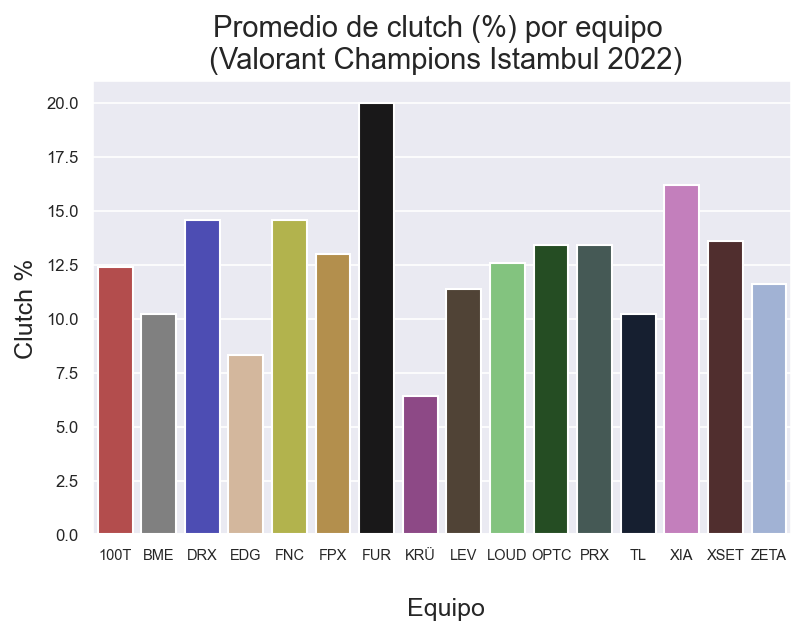

In [119]:
champions = grouped[grouped.Competition == 'valorant champions 2022']
plt.figure(dpi=150)
sns.barplot(data = champions, x='Team', y='CL%_mean', palette=colors, saturation=0.4)
## Cambiar colores
plt.title('Promedio de clutch (%) por equipo \n (Valorant Champions Istambul 2022)', 
          fontsize=14)

plt.ylabel('Clutch %', fontsize=12)
plt.xlabel('\n Equipo', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=8)
plt.show()

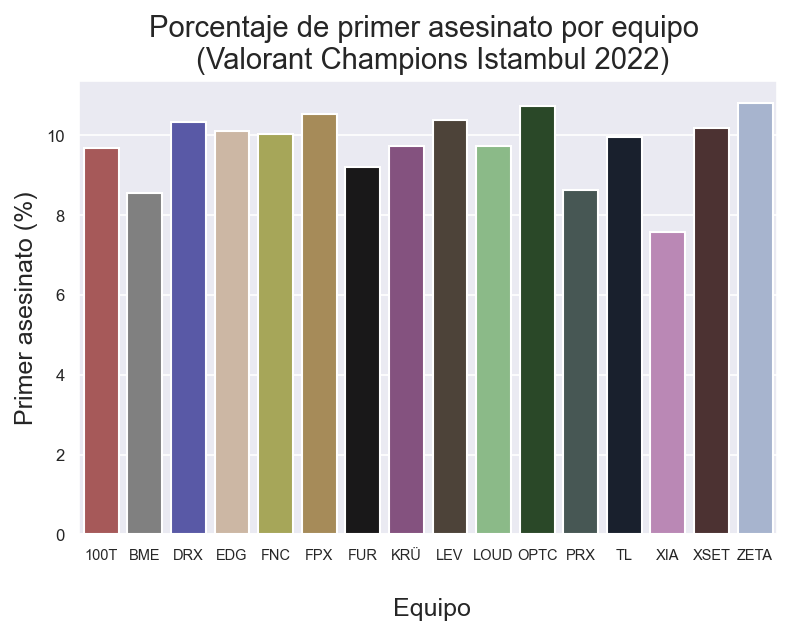

In [120]:
plt.figure(dpi=150)
sns.barplot(data = champions, x='Team', y='FK%_mean', palette=colors, saturation=0.3)
## Cambiar colores
plt.title('Porcentaje de primer asesinato por equipo \n (Valorant Champions Istambul 2022)', 
          fontsize=14)

plt.ylabel('Primer asesinato (%)', fontsize=12)
plt.xlabel('\n Equipo', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=8)
plt.show()

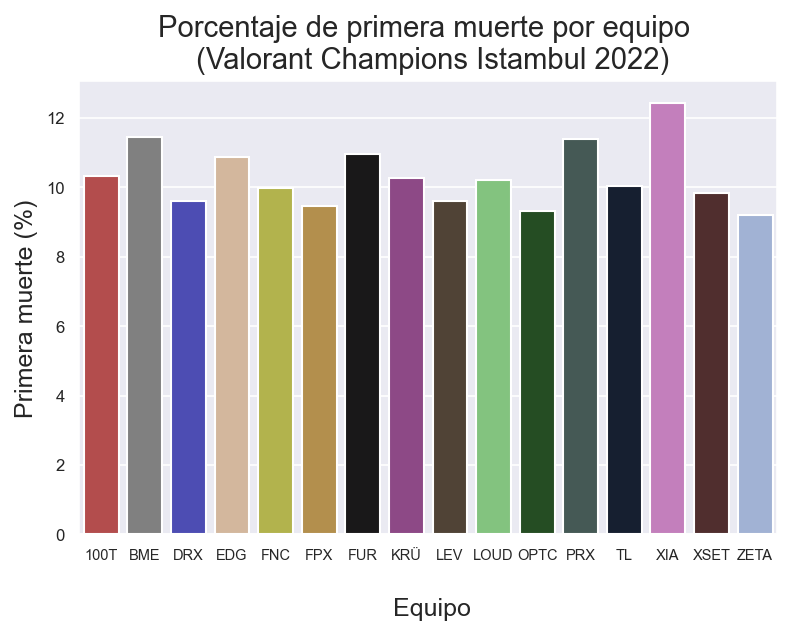

In [121]:
plt.figure(dpi=150)
sns.barplot(data = champions, x='Team', y='FD%_mean', palette=colors, saturation=0.4)
## Cambiar colores
plt.title('Porcentaje de primera muerte por equipo \n (Valorant Champions Istambul 2022)', 
          fontsize=14)

plt.ylabel('Primera muerte (%)', fontsize=12)
plt.xlabel('\n Equipo', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=8)
plt.show()

<AxesSubplot:xlabel='CL%_mean', ylabel='ACS_mean'>

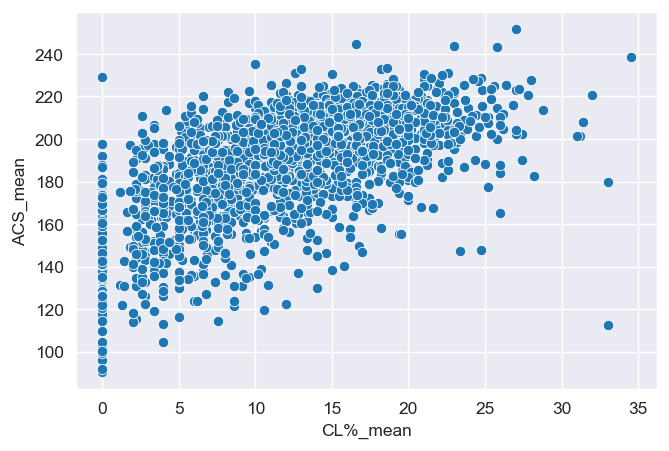

In [122]:
plt.figure(dpi=125)
sns.scatterplot(data=grouped, x='CL%_mean', y='ACS_mean')

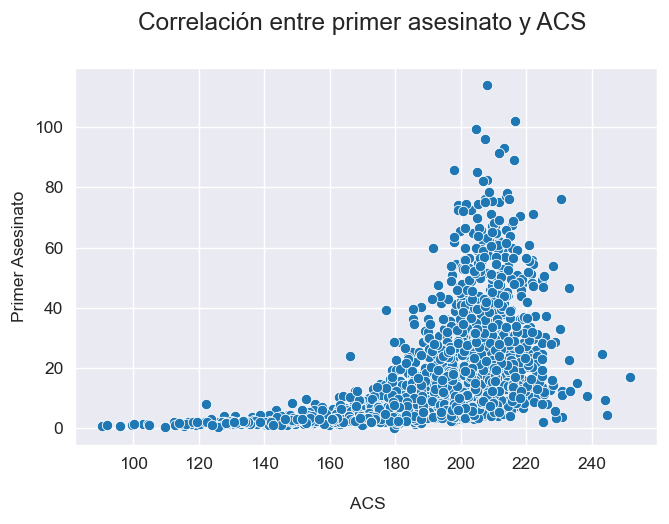

In [123]:
plt.figure(dpi=125)
sns.scatterplot(data=grouped, x='ACS_mean', y='FK_mean')

plt.title('Correlación entre primer asesinato y ACS \n ', fontsize=14)

plt.xlabel('\n ACS')
plt.ylabel('Primer Asesinato')

plt.show()

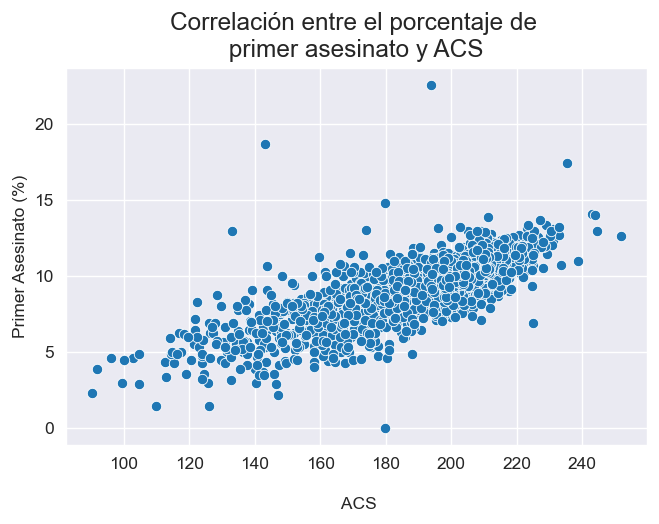

In [169]:
# Primeros asesinatos ponderados por ronda jugadas en todos los torneos
plt.figure(dpi=125)
sns.scatterplot(data=grouped, x='ACS_mean', y='FK%_mean')

plt.title('Correlación entre el porcentaje de \n primer asesinato y ACS ', fontsize=14)

plt.xlabel('\n ACS')
plt.ylabel('Primer Asesinato (%)')

plt.show()

In [129]:
df.groupby('Main Agent').agg({'FK%':'mean', 'FD%':'mean', 'ACS':'mean', 'KPR':'mean'})

,FK%,FD%,ACS,KPR
Main Agent,,,,
astra,6.714078,8.542166,177.837207,0.629466
bb2a4828-46eb-8cd1-e,6.482963,13.821789,156.750000,0.560000
breach,6.611583,8.884401,177.340039,0.618975
brimstone,6.552343,8.517943,179.896000,0.621400
chamber,11.635347,11.788164,200.319071,0.705721
cypher,7.368844,9.468048,180.998638,0.633815
fade,6.967097,7.637348,185.886765,0.645147
jett,16.192233,15.906872,216.240940,0.749427
kayo,8.205657,10.229772,188.013448,0.646690


In [ ]:
df.loc[df['Main Agent'] == 'bb2a4828-46eb-8cd1-e']

In [160]:
df.loc[(752), 'Main Agent'] = 'jett'
df.loc[(7820), 'Main Agent'] = 'brimstone'

In [193]:
## Inferimos el rol principal a partir del agente principal

dic_map = {'Sentinel': ['cypher', 'sage', 'killjoy'], 'Controller': ['brimstone', 'omen', 'viper', 'astra'], 
       'Duelist': ['jett', 'reyna', 'raze', 'yoru', 'chamber', 'neon'], 'Initiator': ['sova', 'breach', 'fade', 'kayo', 'skye']}

def role(string):
    for k, v in dic_map.items():
        if string in v:
            return k

df['Main Role'] = df['Main Agent'].map(role)
    

In [194]:
df[['Main Agent', 'Main Role']]

,Main Agent,Main Role
0,cypher,Sentinel
1,skye,Initiator
2,neon,Duelist
3,breach,Initiator
4,brimstone,Controller
...,...,...
11648,raze,Duelist
11649,breach,Initiator
11650,astra,Controller
11651,chamber,Duelist


In [195]:
df['Main Agent'] = df['Main Agent'].apply(lambda x: x.capitalize())

In [196]:
df[['Main Agent', 'Main Role']]

,Main Agent,Main Role
0,Cypher,Sentinel
1,Skye,Initiator
2,Neon,Duelist
3,Breach,Initiator
4,Brimstone,Controller
...,...,...
11648,Raze,Duelist
11649,Breach,Initiator
11650,Astra,Controller
11651,Chamber,Duelist


<AxesSubplot:xlabel='ACS', ylabel='FK%'>

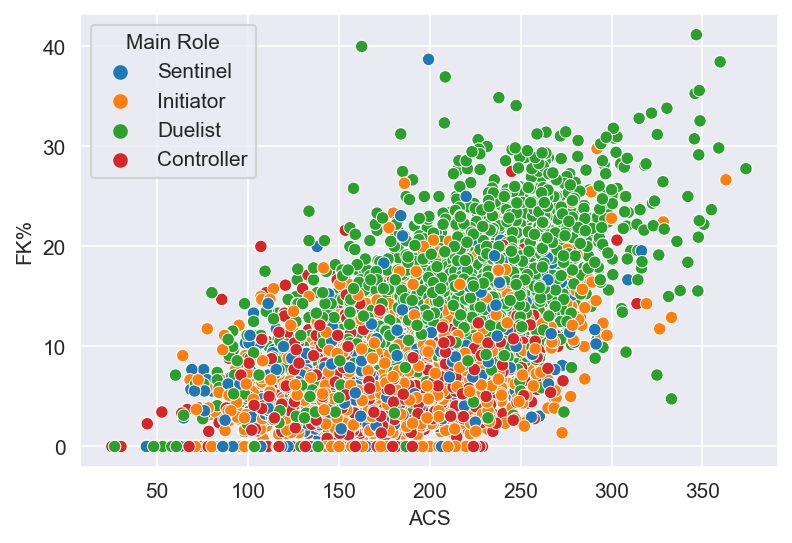

In [210]:
plt.figure(dpi=150)
sns.scatterplot(data=df, x='ACS', y='FK%', hue='Main Role')

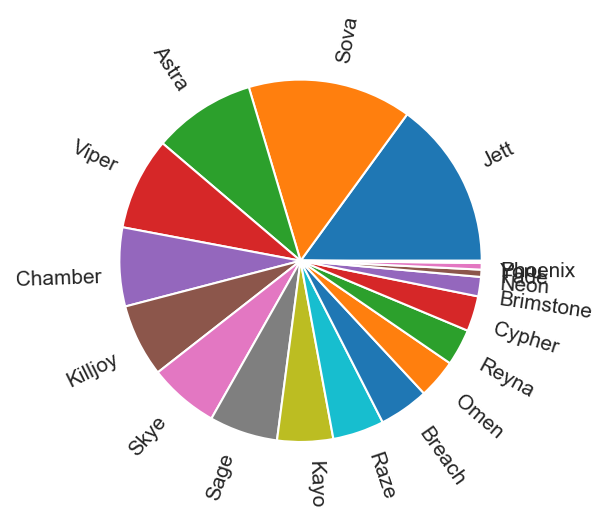

In [230]:
plt.figure(dpi=150)
plt.pie(x=df['Main Agent'].value_counts(), labels = df['Main Agent'].value_counts().index, rotatelabels=0.5)
plt.show()

In [222]:
df['Main Agent'].value_counts().index

Index(['Jett', 'Sova', 'Astra', 'Viper', 'Chamber', 'Killjoy', 'Skye', 'Sage',
       'Kayo', 'Raze', 'Breach', 'Omen', 'Reyna', 'Cypher', 'Brimstone',
       'Neon', 'Fade', 'Yoru', 'Phoenix'],
      dtype='object')

In [202]:
agrole = df.groupby(['Competition', 'Main Agent', 'Main Role']).agg({'FK%':'mean', 'FD%':'mean', 'ACS':'mean', 'KPR':'mean'}).reset_index()

<AxesSubplot:xlabel='ACS', ylabel='FK%'>

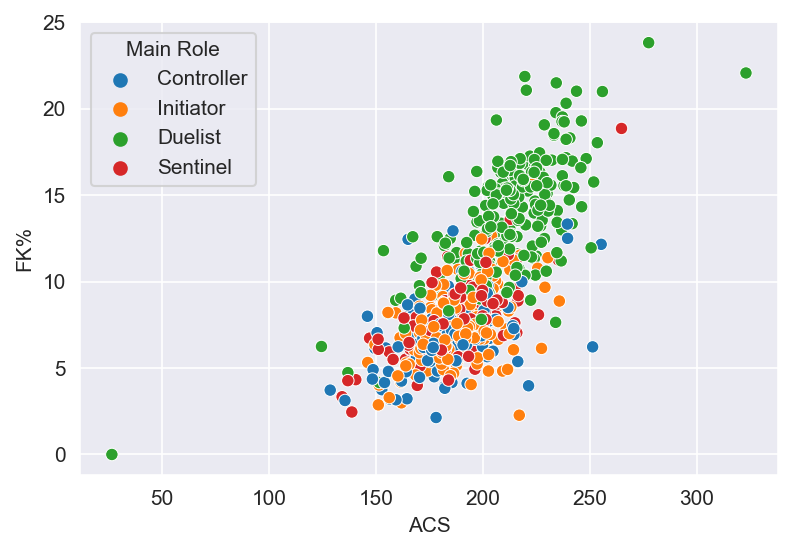

In [204]:
plt.figure(dpi=150)
sns.scatterplot(data=agrole, x='ACS', y='FK%', hue='Main Role')

## Description:

* Player: Player handle
* Agents: The three most played agents throughout the tournament
* Rnd: Total number of rounds played
* ACS: Average Combat Score
* K:D: Kill/Death ratio
* KAST: Kill, Death, Assist, Trade percentage
* ADR: Average Damage per Round
* KPR: Kills per Round
* APR: Assists per round
* FKPR: First Kill per round
* FDPR: First Death per round
* HS%: Headshot percentage
* CL%: Clutch Success percentage
* CL: Clutches won/played
* KMax: Maximum kills in a game
* K: Total Kills
* D: Total Deaths
* A: Total Assists
* FK: Total First Kills
* FD: Total First Deaths

## SINGLE MATCH DATA

In [ ]:
## TRY TO SET UP ANOTHER DF TO STORE SINGLE MATCH OUTCOMES 
match_list= []

matches_soup = soup.find_all('div', class_='event-brackets-container')

str(matches_soup[0].contents[1].contents[1]).split('title=')[1].split('>')[0]

In [175]:
# GO TO MATCH HISTORY WITHIN TOURNAMENT MAYBE ITS EASIER TO GET EVERY MATCH FROM HERE INSTEAD OF GETTING IT FROM THE TREE
body = soup.find_all('a')

mhistory_link = [l.get('href') for l in body]

mhistory_link = [l for l in mhistory_link[:-1] if 'completed' in l]

In [177]:
mhistory_link = [f"https://www.vlr.gg{l}" for l in mhistory_link]

In [180]:
data1 = requests.get(mhistory_link[0])
soup1 = BeautifulSoup(data1.content)

In [ ]:
ss = soup1.find_all('a')
    

In [209]:
## GET TEAM NAMES FROM HERE
ind_soup = soup1.find_all('div', class_= 'text-of')

In [245]:
## ind_soup[0].contents[-1]
count = 0
matcches_list = [ ]
for i in range(len(ind_soup)):
    
    ind_soup[i].contents[-1].split('\t\t')[5]        ## Get team
    

'\tOpTic Gaming'

In [255]:
ind_soup[7].contents[-1]

'\n\t\t\t\t\t\t\t\tLower Bracket Finals\t\t\t\t\t\t\t'

In [218]:
df

,Player,Agents,Rnd,ACS,K:D,KAST%,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMax,K,D,A,FK,FD,Competition,Team,Circuit
0,Kush,"['cypher', 'fade', 'kayo']",160,235.3,1.11,70,155.2,0.83,0.22,0.11,0.03,28,16,5/31,26,133,120,35,18,5,champions tour asia pacific last chance qualifier,AE,VCT 2022
1,noxxy,"['skye', 'chamber']",160,213.0,1.05,71,142.9,0.78,0.15,0.14,0.16,29,6,1/17,29,124,118,24,22,25,champions tour asia pacific last chance qualifier,AE,VCT 2022
2,deLb,"['neon', 'raze']",160,205.6,0.84,71,141.1,0.64,0.27,0.14,0.16,23,8,1/12,20,103,123,43,22,25,champions tour asia pacific last chance qualifier,AE,VCT 2022
3,adrnking,"['breach', 'skye']",160,171.4,0.87,68,115.2,0.61,0.31,0.07,0.07,29,15,2/13,19,98,113,50,11,11,champions tour asia pacific last chance qualifier,AE,VCT 2022
4,axeLuvYa,['brimstone'],160,152.7,0.77,73,103.0,0.54,0.43,0.04,0.09,26,26,6/23,20,86,112,68,6,15,champions tour asia pacific last chance qualifier,AE,VCT 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,iSpeeed,"['raze', 'kayo']",35,221.0,0.89,66,144.3,0.71,0.17,0.09,0.14,17,0,0/7,15,25,28,6,3,5,valorant conquerors championship,wm,VCT 2022
11649,ZinG,"['breach', 'sova']",35,198.5,0.93,54,135.7,0.71,0.17,0.03,0.09,30,0,0/5,18,25,27,6,1,3,valorant conquerors championship,wm,VCT 2022
11650,dennyS,['astra'],35,178.0,0.60,63,114.6,0.51,0.23,0.06,0.17,24,0,0/5,11,18,30,8,2,6,valorant conquerors championship,wm,VCT 2022
11651,M I N G,"['chamber', 'jett']",35,150.5,0.58,57,94.1,0.51,0.03,0.09,0.17,23,0,0/5,10,18,31,1,3,6,valorant conquerors championship,wm,VCT 2022


In [222]:
grouped = df.groupby(['Team']).mean()

In [223]:
grouped

,Rnd,ACS,K:D,KAST%,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,KMax,K,D,A,FK,FD
Team,,,,,,,,,,,,,,,,,
010,42.000000,186.90,0.910000,66.6,124.420000,0.668000,0.184000,0.100000,0.1000,35.200000,5.400000,17.6,28.000000,31.200000,7.800000,4.200000,4.200000
0Zer,145.000000,211.56,1.126000,74.4,141.780000,0.746000,0.324000,0.106000,0.0940,20.400000,7.800000,19.4,108.200000,96.400000,47.000000,15.200000,13.800000
100T,417.000000,197.54,0.994000,71.7,130.155000,0.688000,0.291500,0.099500,0.1035,26.300000,13.000000,23.8,295.800000,286.950000,123.300000,42.500000,41.750000
100p,45.000000,188.90,0.834000,65.2,129.580000,0.662000,0.220000,0.090000,0.1060,26.000000,22.200000,16.2,29.800000,36.200000,9.800000,4.000000,4.800000
1337,111.400000,209.52,1.026000,69.2,137.620000,0.742000,0.240000,0.104000,0.0880,24.800000,21.000000,18.8,82.200000,80.200000,27.400000,11.400000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zZz,198.333333,201.20,0.976667,68.5,133.133333,0.703333,0.238333,0.088333,0.1050,24.333333,16.666667,24.5,137.666667,143.333333,45.166667,18.833333,20.833333
zero,106.000000,199.36,1.042000,67.0,132.820000,0.704000,0.234000,0.094000,0.1080,26.200000,13.000000,20.2,74.600000,72.400000,24.800000,9.800000,11.400000
zyzz,43.000000,180.90,0.798000,63.6,119.060000,0.632000,0.272000,0.050000,0.1500,26.600000,20.600000,15.6,27.200000,34.600000,11.600000,2.200000,6.400000
